In [1]:
import torch
from torchvision import models

vit_b_16 = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)
vit_b_32 = models.vit_b_32(weights=models.ViT_B_32_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /home/paperspace/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth
100.0%


In [2]:
def set_parameter_requires_grad(model, flag):
    if flag:
        for param in model.parameters():
            param.requires_grad = False

In [3]:
set_parameter_requires_grad(vit_b_16, True)

In [4]:
vit_b_16.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

In [5]:
from core.CNN_scorers import TorchScorer

In [6]:
model = TorchScorer(model_name='vit_b_16')

In [7]:
import matplotlib.pyplot as plt

In [9]:
from core.insilico_exps import resize_and_pad_tsr

In [29]:
img = plt.imread('../../Datasets/imagenette2/train/n01440764/ILSVRC2012_val_00000293.JPEG')
img_2 = plt.imread('../../Datasets/imagenette2/train/n01440764/ILSVRC2012_val_00002138.JPEG')

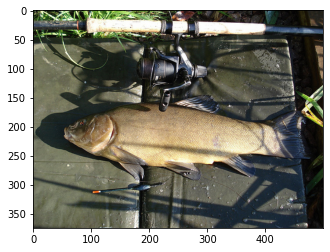

In [30]:
plt.imshow(img_2)

In [31]:
def process_img(img):
    img_tensor = torch.Tensor(img).permute((2, 0, 1)).unsqueeze(dim=0)
    img_new = resize_and_pad_tsr(img_tensor, (224, 224), (0, 0))
    return img_new

In [32]:
img_tensor_2 = process_img(img_2)

In [34]:
img_set = torch.concat([img_new, img_tensor_2])
img_set.shape

torch.Size([2, 3, 224, 224])

In [17]:
img_tensor = torch.Tensor(img).permute((2, 0, 1)).unsqueeze(dim=0)
img_tensor.shape

torch.Size([1, 3, 375, 500])

In [22]:
img_new = resize_and_pad_tsr(img_tensor, (224, 224), (0, 0))

In [35]:
model_unit = ("vit_b_16", ".heads.Linearhead", 1)
model.select_unit(model_unit)
model.score_tsr(img_set)

array([-0.49087685, -0.79717231])

In [ ]:
torch.utils.data.DataLoader

In [12]:
imgs = torch.rand(size=(100, 3, 224, 224))

In [14]:
imgs[0].shape

torch.Size([3, 224, 224])

In [15]:
import matplotlib.pyplot as plt

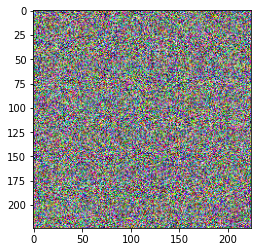

In [17]:
plt.imshow(imgs[0].permute((1, 2, 0)).numpy())

In [19]:
model_unit = ("vit_b_16", ".heads.Linearhead", 1)
model.select_unit(model_unit)

In [20]:
model.score_tsr(imgs)

array([0.69283086, 0.5953539 , 0.63793868, 0.59968543, 0.79548329,
       0.73584133, 0.59260529, 0.58871043, 0.60783011, 0.68420416,
       0.57460433, 0.6631034 , 0.79262692, 0.70575958, 0.70272654,
       0.49621686, 0.58337617, 0.61540872, 0.55218369, 0.72655851,
       0.75444514, 0.62354672, 0.74673831, 0.58070785, 0.6276688 ,
       0.68151122, 0.67523968, 0.71217   , 0.66632766, 0.62020928,
       0.70896226, 0.86553198, 0.79255241, 0.61102653, 0.78776908,
       0.79022843, 0.66643041, 0.72226876, 0.79116601, 0.7623325 ,
       0.71049845, 0.79832608, 0.59444058, 0.6784898 , 0.67285043,
       0.73934454, 0.66880953, 0.73693269, 0.70428097, 0.68068856,
       0.74608809, 0.74662572, 0.81417757, 0.59485298, 0.61442643,
       0.62080538, 0.76511848, 0.71689719, 0.56042475, 0.64318627,
       0.65824473, 0.762016  , 0.7679649 , 0.69258732, 0.65646565,
       0.69018477, 0.74307054, 0.63976222, 0.58473033, 0.7474764 ,
       0.66056478, 0.90982842, 0.60990793, 0.72338814, 0.76606